###### The Objective of this analysis is:
* Understand the Dataset & cleanup (if required).
* Build Regression models to predict the fare price of uber ride.
* Also evaluate the models performance

The dataset can be found [here ](https://www.kaggle.com/yasserh/uber-fares-dataset). 

In [1]:
# Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and read the data
data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
data.tail(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [4]:
data.shape

(200000, 9)

In [5]:
# Look For any missing data 
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
# Drop missing values
data.dropna(axis=0, inplace=True)
data.isna().any()

Unnamed: 0           False
key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool

In [7]:
# Look for any duplicated entries 
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [9]:
# Converting Longitudes and Latitudes to Miles 
from math import radians, cos, sin, asin, sqrt

def distance(pickup_lat, dropoff_lat, pickup_lon, dropoff_lon):
    # Convert degrees to radians
    pickup_lon  = radians(pickup_lon)
    dropoff_lon = radians(dropoff_lon)
    pickup_lat   = radians(pickup_lat)
    dropoff_lat  = radians(dropoff_lat)

    # Haversine formula
    distance_longitude = dropoff_lon - pickup_lon
    distance_latitude = dropoff_lat - pickup_lat
    a = sin(distance_latitude / 2)**2 + cos(pickup_lat) * cos(dropoff_lat) * sin(distance_longitude / 2)**2
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kms
    km = 6371

    # calculate the result
    return(c * km)

In [10]:
data['trip_distance']= data.apply(lambda x: distance(x['pickup_latitude'],x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1).round(2)

In [11]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


In [12]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [13]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


In [14]:
# Convert pickup datetime column to a datetime dtype
data['datetime(pickup)'] = pd.to_datetime(data.pickup_datetime)
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,datetime(pickup)
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015-05-07 19:52:06+00:00
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009-07-17 20:04:56+00:00
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009-08-24 21:45:00+00:00
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009-06-26 08:22:21+00:00
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014-08-28 17:47:00+00:00


In [15]:
data['year'] = pd.DatetimeIndex(data['datetime(pickup)']).year
data['month'] = pd.DatetimeIndex(data['datetime(pickup)']).month
data['day'] = pd.DatetimeIndex(data['datetime(pickup)']).day
data['weekday'] = pd.DatetimeIndex(data['datetime(pickup)']).dayofweek
data['hour'] = pd.DatetimeIndex(data['datetime(pickup)']).hour

In [16]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,datetime(pickup),year,month,day,weekday,hour
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015-05-07 19:52:06+00:00,2015,5,7,3,19
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009-07-17 20:04:56+00:00,2009,7,17,4,20
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009-08-24 21:45:00+00:00,2009,8,24,0,21
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009-06-26 08:22:21+00:00,2009,6,26,4,8
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014-08-28 17:47:00+00:00,2014,8,28,3,17


In [17]:
len(data[data['trip_distance'] == 0])

5997

In [18]:
# Drop trips with 0 miles travelled 
data.drop(data[data['trip_distance'] == 0].index, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194002 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                194002 non-null  object             
 1   fare_amount        194002 non-null  float64            
 2   pickup_datetime    194002 non-null  object             
 3   pickup_longitude   194002 non-null  float64            
 4   pickup_latitude    194002 non-null  float64            
 5   dropoff_longitude  194002 non-null  float64            
 6   dropoff_latitude   194002 non-null  float64            
 7   passenger_count    194002 non-null  int64              
 8   trip_distance      194002 non-null  float64            
 9   datetime(pickup)   194002 non-null  datetime64[ns, UTC]
 10  year               194002 non-null  int64              
 11  month              194002 non-null  int64              
 12  day                194002 non-

In [20]:
# Check if there's any negative fares

data[data['fare_amount'] <= 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,datetime(pickup),year,month,day,weekday,hour
22182,2010-03-20 02:59:51.0000002,0.00,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2,11.07,2010-03-20 02:59:51+00:00,2010,3,20,5,2
63395,2015-03-03 23:07:41.0000008,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1,0.33,2015-03-03 23:07:41+00:00,2015,3,3,1,23
71246,2010-02-11 21:47:10.0000001,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2,0.50,2010-02-11 21:47:10+00:00,2010,2,11,3,21
79903,2015-05-01 14:43:02.0000004,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1,0.38,2015-05-01 14:43:02+00:00,2015,5,1,4,14
87467,2015-01-04 03:51:13.0000002,0.00,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2,8665.98,2015-01-04 03:51:13+00:00,2015,1,4,6,3
89322,2010-03-09 08:26:10.0000006,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5,0.02,2010-03-09 08:26:10+00:00,2010,3,9,1,8
92063,2010-03-12 08:49:10.0000002,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3,8.17,2010-03-12 08:49:10+00:00,2010,3,12,4,8
98875,2015-03-20 21:31:14.0000007,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5,0.45,2015-03-20 21:31:14+00:00,2015,3,20,4,21
104080,2010-03-09 20:25:10.0000002,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1,2.00,2010-03-09 20:25:10+00:00,2010,3,9,1,20
111589,2015-02-23 19:26:44.0000004,-52.00,2015-02-23 19:26:44 UTC,-73.984665,40.759026,0.000000,0.000000,5,8666.25,2015-02-23 19:26:44+00:00,2015,2,23,0,19


In [21]:
len(data[data['fare_amount'] <= 0])

19

In [22]:
data.drop(data[data['fare_amount'] <= 0].index, inplace=True)
len(data[data['fare_amount'] <= 0])

0

###### I've dropped all negative fares because it does not make sense to keep them. A fare can never be negative. 

In [23]:
Q1 = np.percentile(data['fare_amount'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['fare_amount'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['fare_amount'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print('Interquartile Range Is: ', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower Limit Is: ', low_lim)
print('Upper Limit Is', up_lim)
outlier =[]
for x in data['fare_amount']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Number Of Outliers In The Dataset Is: ', len(outlier))

Interquartile Range Is:  6.5
Lower Limit Is:  -3.75
Upper Limit Is 22.25
Number Of Outliers In The Dataset Is:  16524


<AxesSubplot:xlabel='fare_amount'>

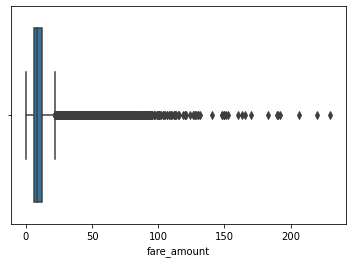

In [24]:
sns.boxplot(data['fare_amount'])

In [25]:
# Perecntage of Outliers in our dataset
per_outliers = (len(outlier) / len(data)) * 100
print(f'Percentage of outliers in our dataset is {round(per_outliers, 2)}.')

Percentage of outliers in our dataset is 8.52.


In [26]:
# Replace Outliers with the Median 
median = np.median(data['fare_amount'])
data["trip_fare"] = np.where(data["fare_amount"] > median, median, data['fare_amount'])

In [27]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,datetime(pickup),year,month,day,weekday,hour,trip_fare
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015-05-07 19:52:06+00:00,2015,5,7,3,19,7.5
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009-07-17 20:04:56+00:00,2009,7,17,4,20,7.7
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009-08-24 21:45:00+00:00,2009,8,24,0,21,8.5
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009-06-26 08:22:21+00:00,2009,6,26,4,8,5.3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014-08-28 17:47:00+00:00,2014,8,28,3,17,8.5


### Analysis & Visualisation 

In [28]:
### Which Year had the highest revenue ?
data.groupby('year')['fare_amount'].sum()

year
2009    295732.70
2010    294179.42
2011    319610.67
2012    349313.36
2013    385581.69
2014    378570.95
2015    174387.95
Name: fare_amount, dtype: float64

<AxesSubplot:xlabel='year'>

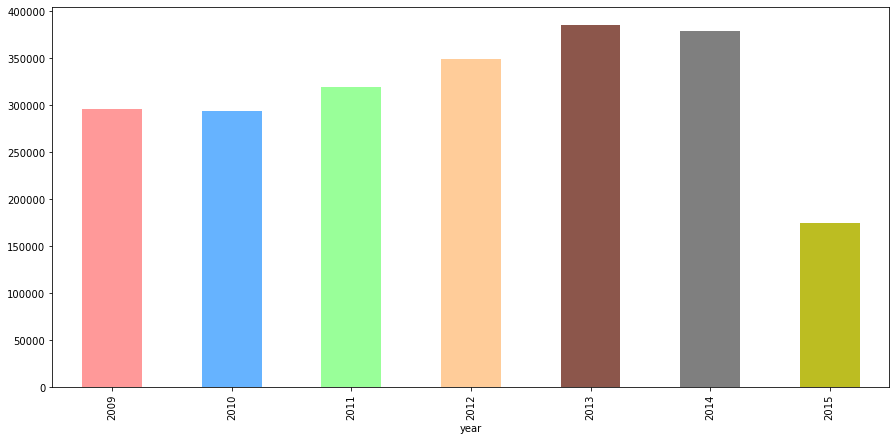

In [29]:
plt.figure(figsize=(15,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#8c564b', '#7f7f7f', '#bcbd22']
data.groupby('year')['fare_amount'].sum().plot(kind = 'bar', color = colors)

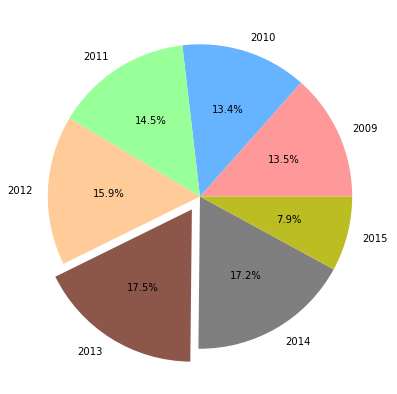

In [30]:
plt.figure(figsize=(15,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#8c564b', '#7f7f7f', '#bcbd22']
explode = (0, 0, 0, 0, 0.1, 0, 0)
data.groupby('year')['fare_amount'].sum().plot(kind='pie', autopct='%1.1f%%', explode=explode, colors=colors)
plt.ylabel('')
plt.show()

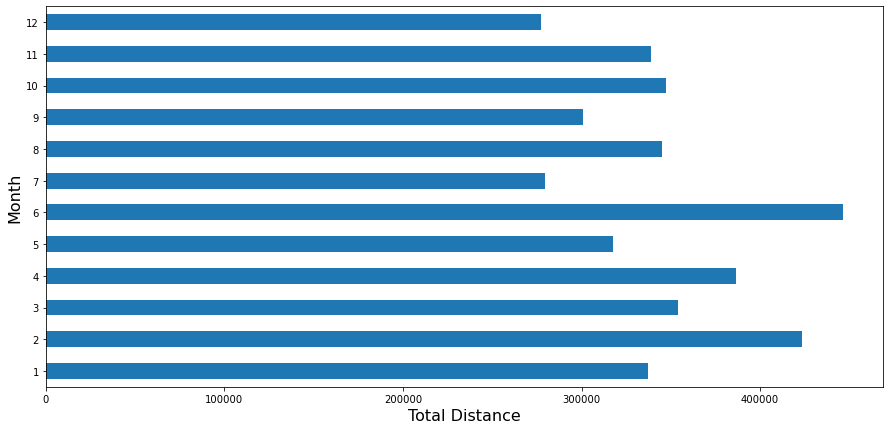

In [31]:
### Which month had the highest trip miles covered 
plt.figure(figsize=(15,7))
data.groupby('month')['trip_distance'].sum().plot(kind='barh')
plt.xlabel('Total Distance', fontsize=(16))
plt.ylabel('Month', fontsize=(16))
plt.show()

### Building A Prediction Model 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [63]:
# Split data data into features and target variable
X = data['trip_distance'].values.reshape(-1, 1)
y = data['fare_amount']
print(X.shape)
print(y.shape)

(193983, 1)
(193983,)


In [64]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state= 1)

In [65]:
#Apply Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Train a Linear Regression Model 
random_reg = RandomForestRegressor()
random_reg.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
print('Train accuracy :', round(random_reg.score(X_train, y_train),2) * 100)
print('Test accuracy :', round(random_reg.score(X_test, y_test),2) * 100)

Train accuracy : 82.0
Test accuracy : 77.0


In [68]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)
print('Train accuracy :', round(knn_model.score(X_train, y_train),2) * 100)
print('Test accuracy :', round(knn_model.score(X_test, y_test),2) * 100)

Train accuracy : 78.0
Test accuracy : 76.0


In [72]:
#Make predictions using Random Forest Regression model
y_pred = random_reg.predict(X_test)

In [73]:
#Compare Actual Outputs vs Predicted Outputs
results = pd.DataFrame({'Actual Output': y_test, 'Predicted Output': y_pred.round(2)})
results.head(10)

,Actual Output,Predicted Output
134066,9.0,7.19
45810,16.5,14.30
173131,8.0,6.19
72001,3.7,4.69
18492,5.3,5.78
21708,5.7,6.45
78871,16.5,12.62
160664,5.7,6.06
23851,9.0,9.84
35171,10.0,8.46


In [74]:
results.tail(10)

,Actual Output,Predicted Output
132685,7.3,6.82
110268,4.5,5.04
24423,7.0,6.65
13669,12.0,8.39
93944,16.5,13.16
186945,9.7,7.87
54424,10.5,6.82
192605,8.9,9.23
61514,9.5,7.89
64735,7.7,7.96
